In this notebook I made a clasification of the types of glass depending on its components by using a Logistic Regression; however, as the prediction results were not amazing on the test sample, I continued to make the classification by using Decision Trees and Random Forests, which gave, unsurprisingly, better results.  

First steps, importing the packages that will be used and the database:

In [6]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier





In [7]:
db = pd.read_csv('glass.csv')
db.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51872,12.93,3.66,1.56,72.51,0.58,8.55,0.00,0.12,BWNF
1,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.00,Headlamps
2,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00,BWF
3,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.00,BWNF
4,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,Headlamps


So the idea is to try and determine the type by using all these components; let's see how many types there are:

In [8]:
db['Type'].value_counts()

Type
BWNF          76
BWF           70
Headlamps     29
VWF           17
Containers    13
Tableware      9
Name: count, dtype: int64

In [9]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


<BarContainer object of 214 artists>


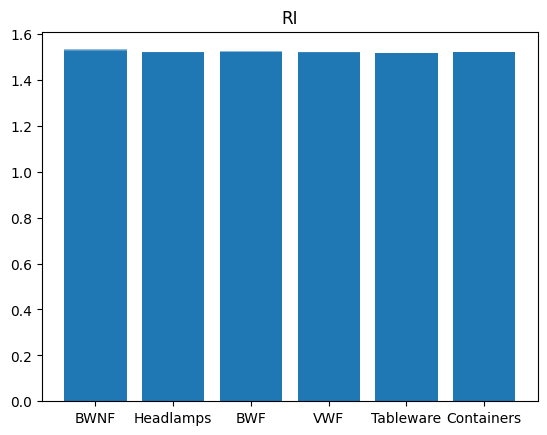

<BarContainer object of 214 artists>


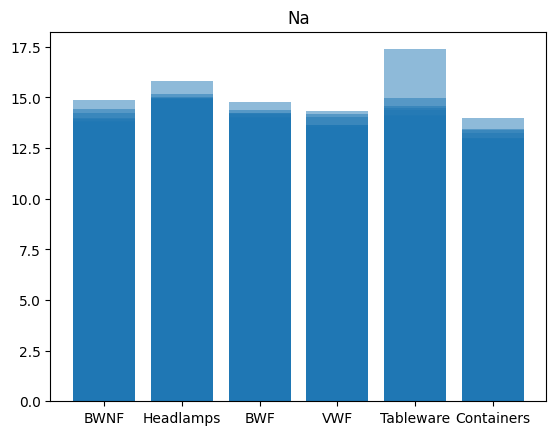

<BarContainer object of 214 artists>


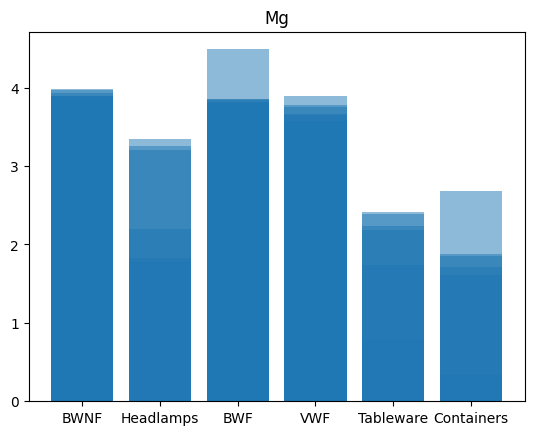

<BarContainer object of 214 artists>


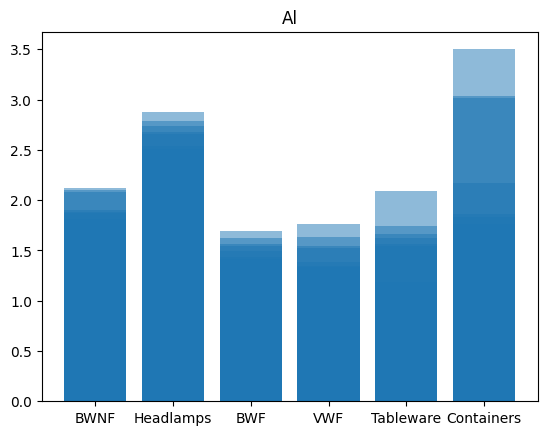

<BarContainer object of 214 artists>


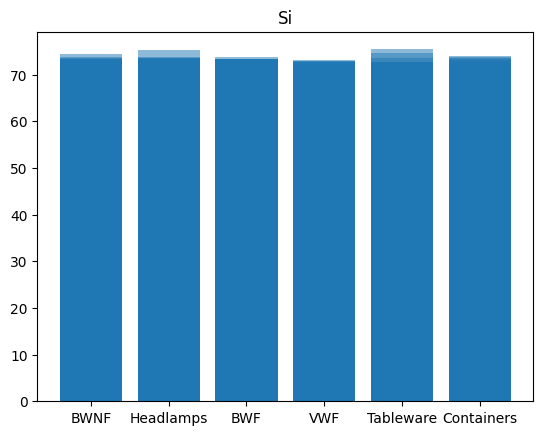

<BarContainer object of 214 artists>


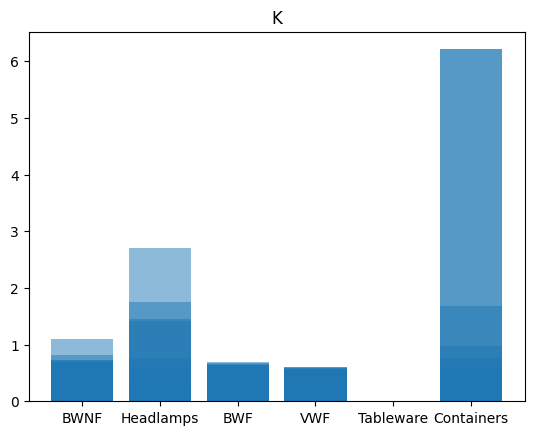

<BarContainer object of 214 artists>


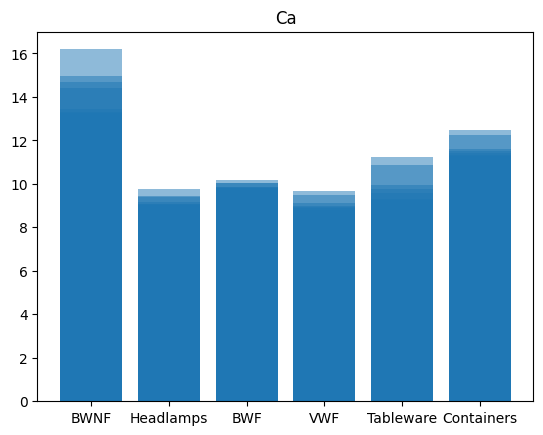

<BarContainer object of 214 artists>


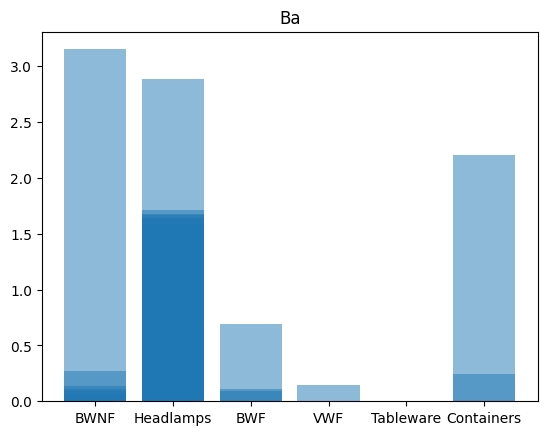

In [10]:
elements = []

for col in db.columns[0:8]:

    elements.append(col)


x  = db['Type']
for elem in elements:

    y = db[elem]
    print(plt.bar(x, y, align='center', alpha=0.5))
    plt.title(elem)

    plt.show()

Checking also the variables' distribution:

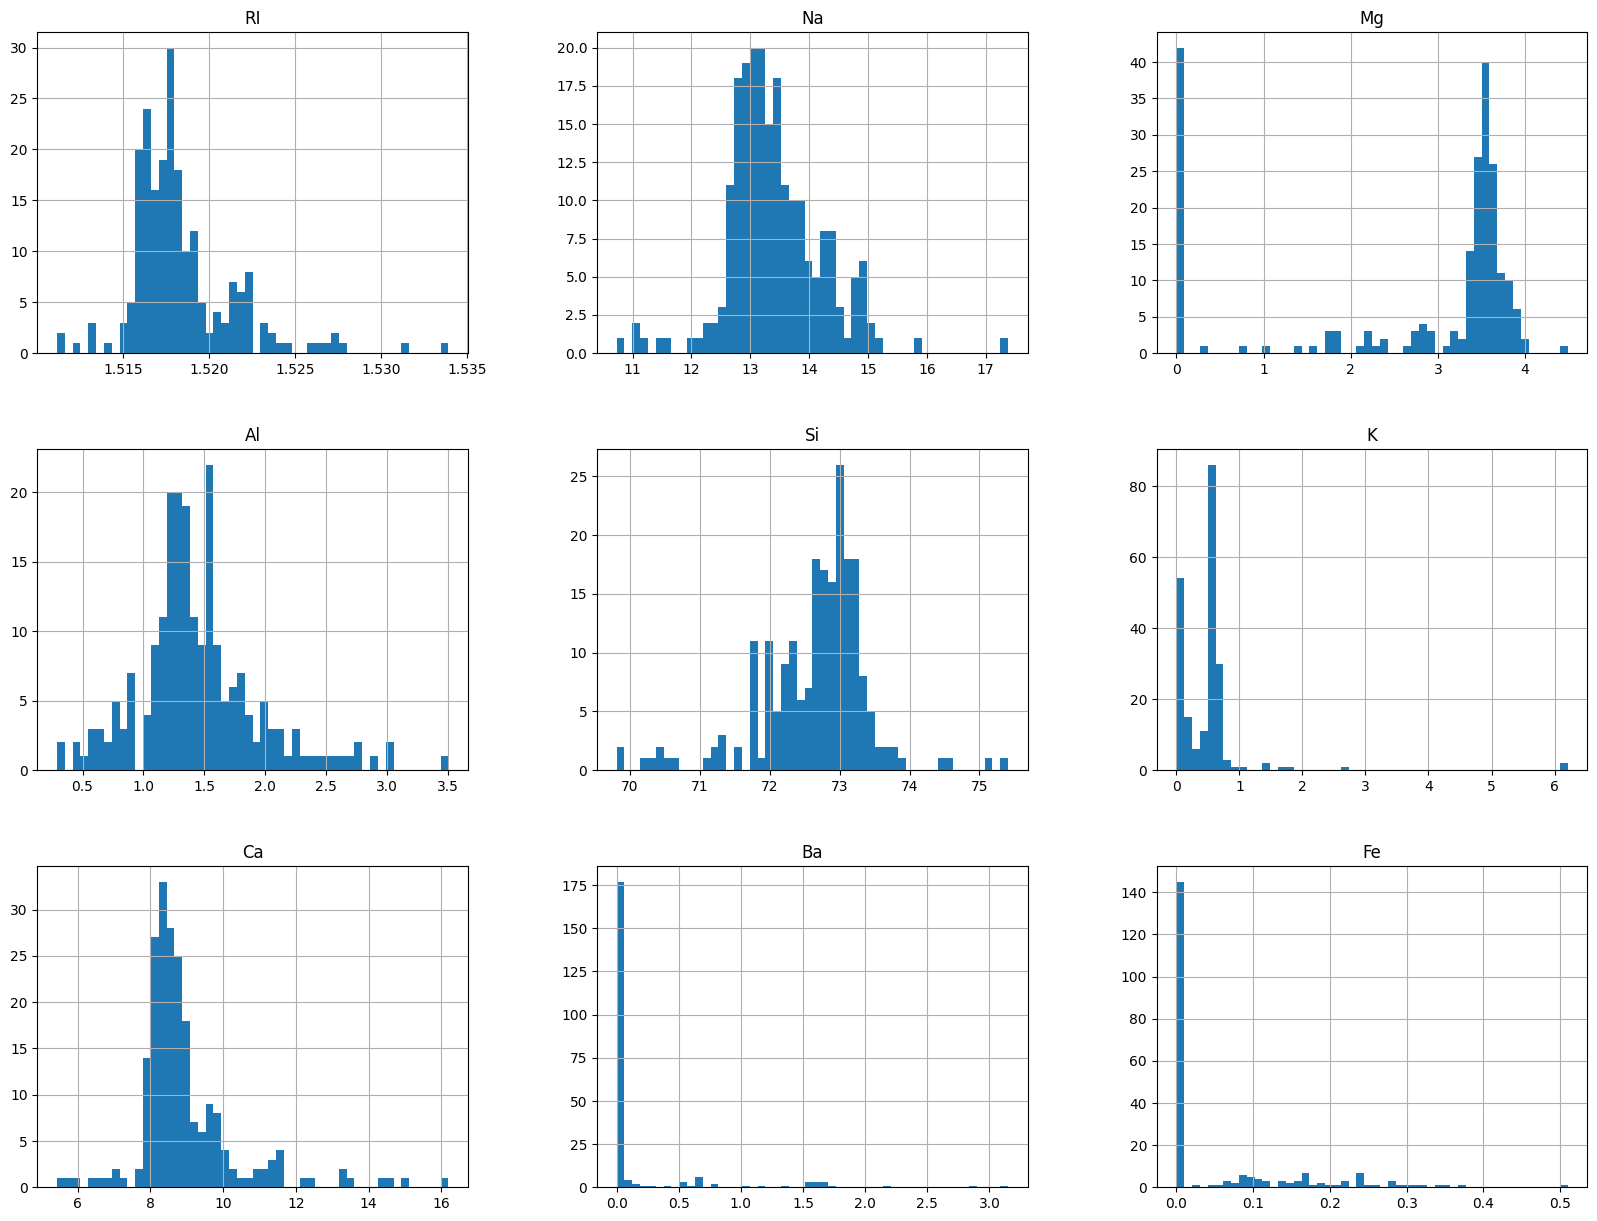

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
db.hist(bins=50,figsize=(20,15))
plt.show()

# 1. Logistic Regression

The data distribution looks very far from normal for most of the variables, but after some research it seems it's preferred not to normalize it, so I will leave it as it is and go on to the train - test split and running the regression:

In [12]:

from sklearn.model_selection import train_test_split as tts
x_train = db.iloc[:,0:8]
y_train = db['Type']
x_train,x_test, y_train, y_test = tts(x_train,y_train, test_size = 0.2, random_state = 18,stratify=db["Type"])


In [13]:
from sklearn.linear_model import LogisticRegression
y_train = np.array(y_train)

log_reg = LogisticRegression(C = 1, max_iter = 50)
log_reg.fit(x_train,y_train.ravel())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, max_iter=50)

Now on to check the performance of the Logistic Regression on the test sample by using the classification report:

In [14]:
y_predict = log_reg.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

from sklearn.metrics import classification_report
classification_report(y_test, y_predict)
target_names = ['1', '2','3','5','6','7']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

           1       0.64      0.64      0.64        14
           2       0.53      0.67      0.59        15
           3       1.00      0.67      0.80         3
           5       0.83      0.83      0.83         6
           6       0.50      0.50      0.50         2
           7       0.00      0.00      0.00         3

    accuracy                           0.63        43
   macro avg       0.58      0.55      0.56        43
weighted avg       0.60      0.63      0.61        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# 2. Decision Trees

So the accuracy is very low, at 0.6, so I will continue testing the Decision Trees algorithm to see what I'll get.
For this, I'l be creating a pipeline that will allow to find faster which parameters are the best,I'm playing on the max_depth and the criterion parameters.

In [15]:
sc = preprocessing.StandardScaler()
dtreeClf = tree.DecisionTreeClassifier()

# Define the pipeline
pipe = Pipeline(steps=[('sc', sc), ('dtreeClf', dtreeClf)])

# Define the parameter grid with different parameters
criterion = ['gini', 'entropy']
max_depth = [4, 5, 6, 7, 8, 10]
min_samples_split = [2, 5, 10, 15]  # Different values
min_samples_leaf = [1, 2, 4, 6]  # Different values

parameters = {
    'dtreeClf__criterion': criterion,
    'dtreeClf__max_depth': max_depth,
    'dtreeClf__min_samples_split': min_samples_split,  # Changed
    'dtreeClf__min_samples_leaf': min_samples_leaf  # Changed
}

# Perform grid search with the new parameters
clf = GridSearchCV(pipe, parameters)
best = clf.fit(x_train, y_train)


In [16]:
y_predict = clf.predict(x_test)

In [17]:
from sklearn.metrics import classification_report #67 accuracy w. grid search
classification_report(y_test, y_predict)
target_names = ['1', '2','3','5','6','7']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.67      0.53      0.59        15
           3       0.43      1.00      0.60         3
           5       1.00      0.83      0.91         6
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3

    accuracy                           0.65        43
   macro avg       0.47      0.54      0.48        43
weighted avg       0.65      0.65      0.64        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

So now the accuracy is better, at 0.65, but not amazing, let's see what parameters it chose:

In [18]:
print(clf.best_params_)

{'dtreeClf__criterion': 'entropy', 'dtreeClf__max_depth': 8, 'dtreeClf__min_samples_leaf': 6, 'dtreeClf__min_samples_split': 5}


# 3. Random Forests

Last but not least, let's test also Random Forests:

In [19]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

sc = preprocessing.StandardScaler()
randomforestClf = RandomForestClassifier()

# Define the pipeline
pipe = Pipeline(steps=[('sc', sc), ('randomforestClf', randomforestClf)])

# Define the parameter grid with different parameters
n_estimators = [500, 600, 550, 300, 200, 100, 700]  # Adjusted
criterion = ['gini', 'entropy']
max_depth = [5, None]
min_samples_split = [0.005, 0.01, 0.015]  # Adjusted
max_features = [0.05, 0.1, 0.15]  # Adjusted

parameters = {
    'randomforestClf__n_estimators': n_estimators,
    'randomforestClf__criterion': criterion,
    'randomforestClf__max_depth': max_depth,
    'randomforestClf__min_samples_split': min_samples_split,
    'randomforestClf__max_features': max_features
}

# Perform grid search with the new parameters
clf = GridSearchCV(pipe, parameters)
best = clf.fit(x_train, y_train)


In [20]:
y_predict = clf.predict(x_test)

Now let's the how the Random Forest performed:

In [21]:
from sklearn.metrics import classification_report
classification_report(y_test, y_predict)
target_names = ['1', '2','3','5','6','7']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90        14
           2       0.79      0.73      0.76        15
           3       0.60      1.00      0.75         3
           5       1.00      0.83      0.91         6
           6       1.00      0.50      0.67         2
           7       1.00      0.33      0.50         3

    accuracy                           0.81        43
   macro avg       0.87      0.73      0.75        43
weighted avg       0.84      0.81      0.80        43



In [22]:
print(clf.best_params_)

{'randomforestClf__criterion': 'gini', 'randomforestClf__max_depth': None, 'randomforestClf__max_features': 0.05, 'randomforestClf__min_samples_split': 0.01, 'randomforestClf__n_estimators': 300}


So at 0.77 accuracy it's the best result until now, based on this it's recommended to use Random Forests for this database.